In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
file_path = '/content/TM_BUDGET_SPENDING_FY17-FY19.xlsx'
df = pd.read_excel(file_path, sheet_name='TM_BUDGET_SPENDING_FY17-FY19')

In [3]:
# Set plot style
sns.set(style="whitegrid")

In [4]:
# Total Budget per Year (Adopted and Revised)
total_budget_per_year = {
    'FY17_Adopted': df['FY17_ADOPTED_BUDGET'].sum(),
    'FY17_Revised': df['FY17_REVISED_BUDGET'].sum(),
    'FY18_Adopted': df['FY18_ADOPTED_BUDGET'].sum(),
    'FY18_Revised': df['FY18_REVISED_BUDGET'].sum(),
    'FY19_Adopted': df['FY19_ADOPTED_BUDGET'].sum(),
    'FY19_Revised': df['FY19_REVISED_BUDGET'].sum(),
}

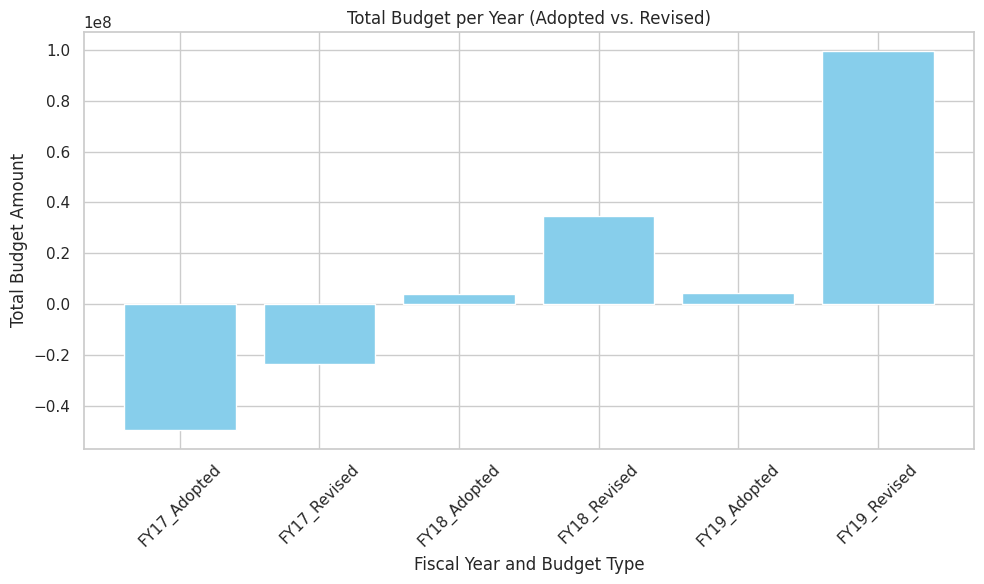

In [5]:
# Total Budget per Year
plt.figure(figsize=(10, 6))
plt.bar(total_budget_per_year.keys(), total_budget_per_year.values(), color='skyblue')
plt.title("Total Budget per Year (Adopted vs. Revised)")
plt.ylabel("Total Budget Amount")
plt.xlabel("Fiscal Year and Budget Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Year-over-Year Budget Growth
yearly_growth = {
    'FY17 to FY18': (df['FY18_ADOPTED_BUDGET'].sum() - df['FY17_ADOPTED_BUDGET'].sum()) / df['FY17_ADOPTED_BUDGET'].sum() * 100,
    'FY18 to FY19': (df['FY19_ADOPTED_BUDGET'].sum() - df['FY18_ADOPTED_BUDGET'].sum()) / df['FY18_ADOPTED_BUDGET'].sum() * 100
}

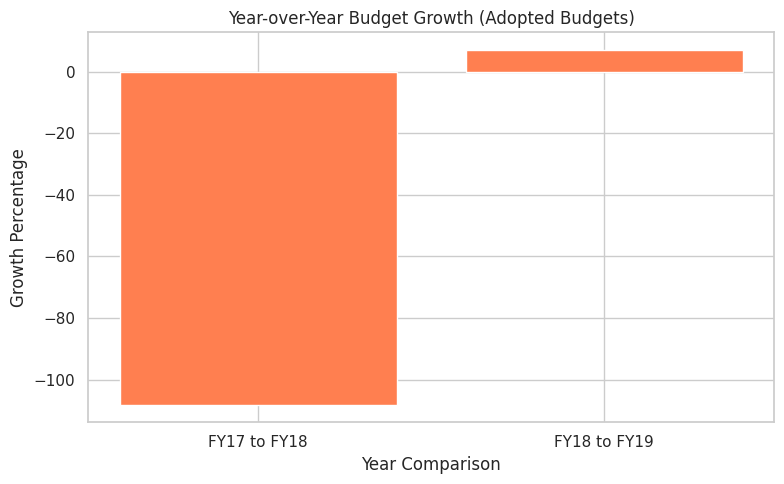

In [7]:
# Year-over-Year Budget Growth
plt.figure(figsize=(8, 5))
plt.bar(yearly_growth.keys(), yearly_growth.values(), color='coral')
plt.title("Year-over-Year Budget Growth (Adopted Budgets)")
plt.ylabel("Growth Percentage")
plt.xlabel("Year Comparison")
plt.tight_layout()
plt.show()

In [8]:
# Department-wise Spending Comparison (Actuals)
dept_spending = df.groupby('DEPARTMENT')[['FY17_ACTUAL', 'FY18_ACTUAL', 'FY2019_ACTUAL']].sum()

<Figure size 1400x800 with 0 Axes>

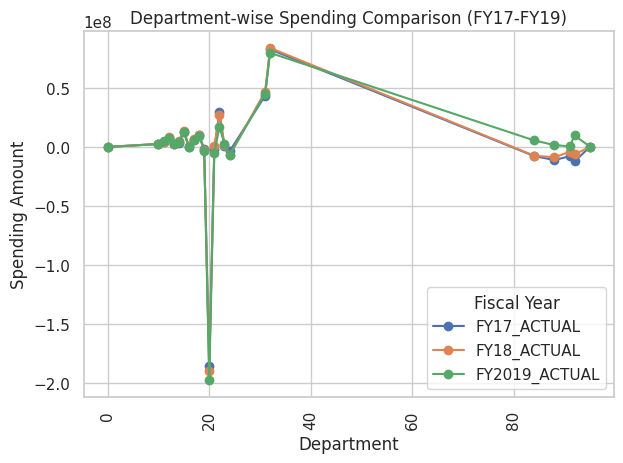

In [9]:
# Department-wise Spending Comparison
plt.figure(figsize=(14, 8))
dept_spending.plot(kind='line', marker='o')
plt.title("Department-wise Spending Comparison (FY17-FY19)")
plt.ylabel("Spending Amount")
plt.xlabel("Department")
plt.xticks(rotation=90)
plt.legend(title="Fiscal Year")
plt.tight_layout()
plt.show()

In [10]:
# Revenue vs. Expenses by Account Type for FY19
account_spending = df.groupby('ACCOUNT_TYPE_DESC')['FY19_ADOPTED_BUDGET'].sum()

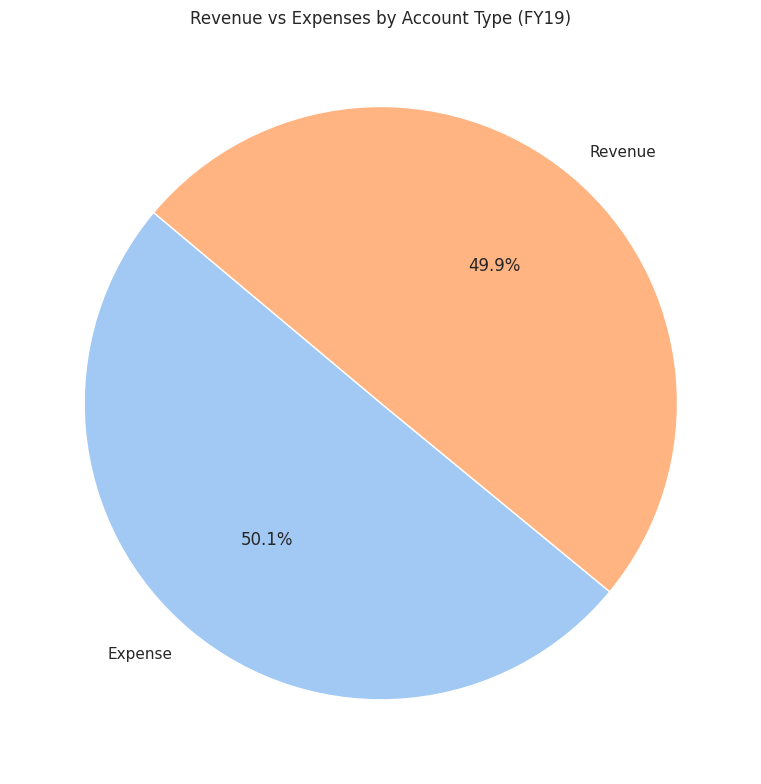

In [11]:
# Revenue vs Expenses by Account Type (FY19)
plt.figure(figsize=(8, 8))
# Taking the absolute value of the data to remove negative values for the pie chart
account_spending_abs = account_spending.abs()
account_spending_abs.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Revenue vs Expenses by Account Type (FY19)")
plt.ylabel('')  # Hide y-label for pie chart
plt.tight_layout()
plt.show()

In [12]:
# Top 10 Highest Budgeted Departments in FY19
top_departments = df.groupby('DEPARTMENT')['FY19_ADOPTED_BUDGET'].sum().nlargest(10)

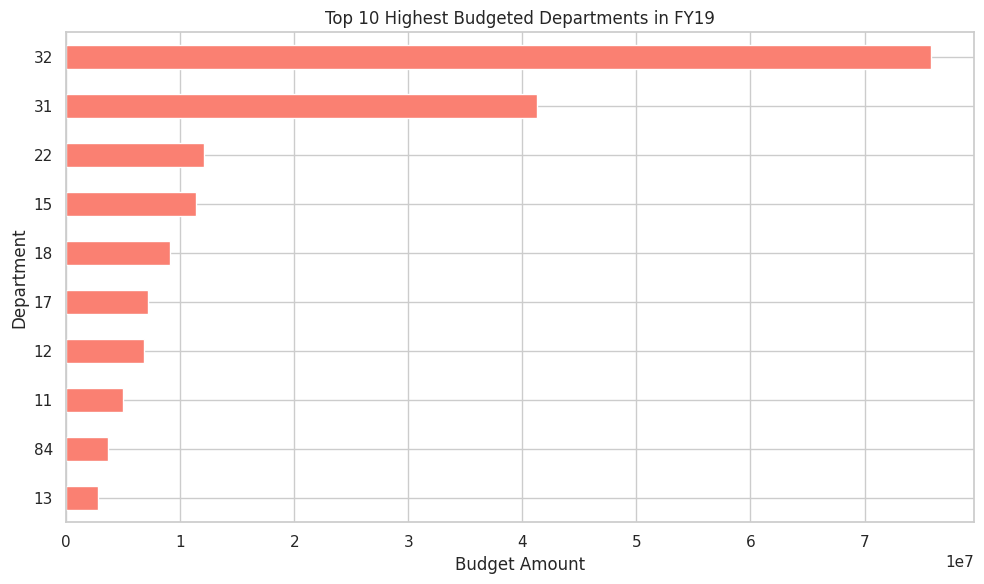

In [13]:
# Top 10 Highest Budgeted Departments in FY19
plt.figure(figsize=(10, 6))
top_departments.plot(kind='barh', color='salmon')
plt.title("Top 10 Highest Budgeted Departments in FY19")
plt.xlabel("Budget Amount")
plt.ylabel("Department")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
# Budget Distribution by Object Description
object_budget = df.groupby('OBJECT_DESC')['FY19_ADOPTED_BUDGET'].sum().nlargest(10)

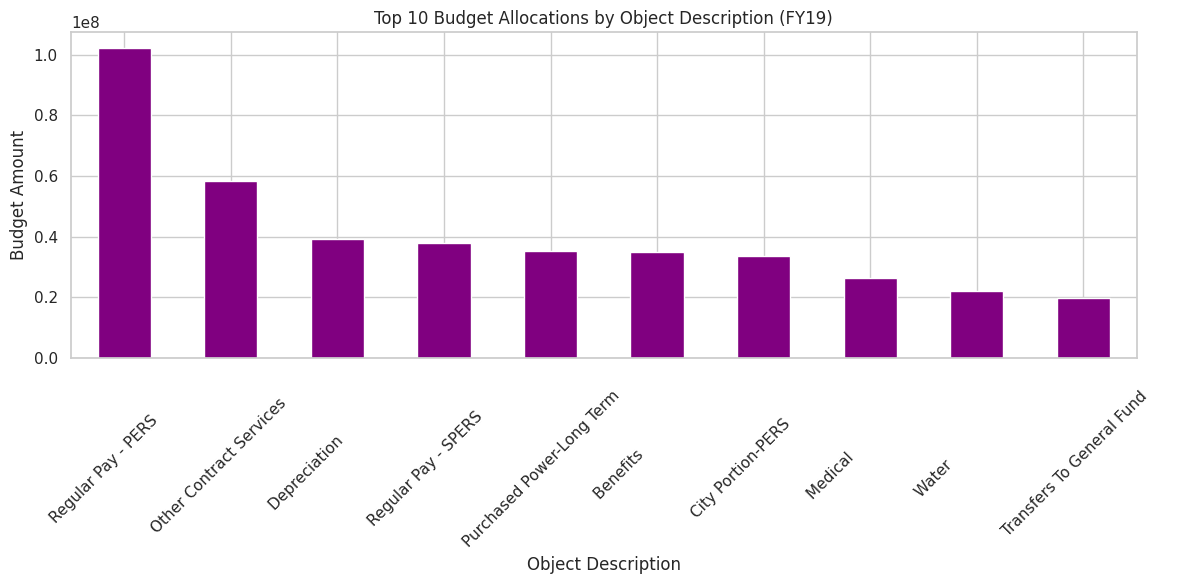

In [21]:
# Budget Distribution by Object Description (Top 10)
plt.figure(figsize=(12, 6))
object_budget.plot(kind='bar', color='purple')
plt.title("Top 10 Budget Allocations by Object Description (FY19)")
plt.xlabel("Object Description")
plt.ylabel("Budget Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Monthly Trend Analysis for FY19 (if data has monthly breakdowns)
# Assuming each row represents a monthly breakdown in your dataset; adjust as per actual structure
if 'MONTH' in df.columns:
    monthly_trend = df.groupby('MONTH')['FY2019_ACTUAL'].sum()
    plt.figure(figsize=(12, 6))
    monthly_trend.plot(kind='line', marker='o', color='green')
    plt.title("Monthly Trend of Spending (FY19)")
    plt.xlabel("Month")
    plt.ylabel("Actual Spending Amount")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

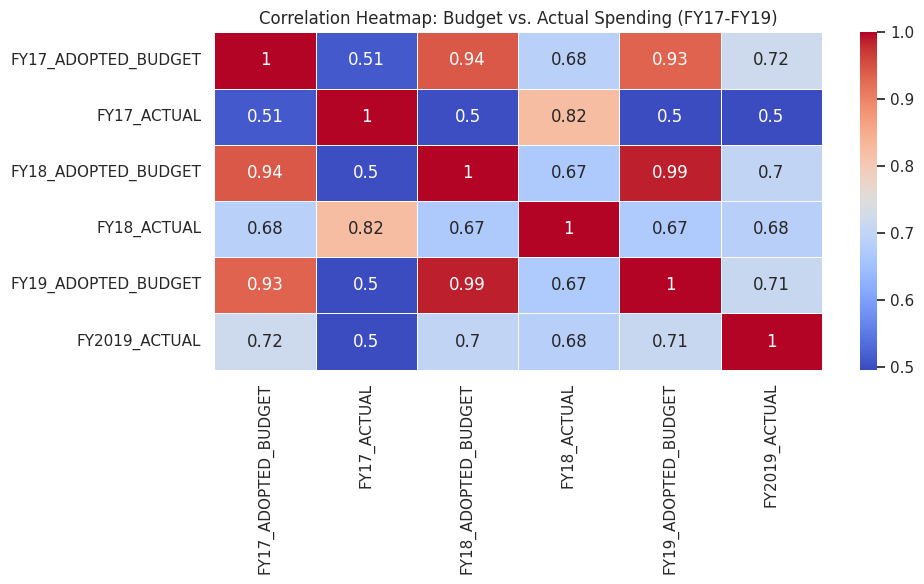

In [19]:
# Heatmap of Budget vs. Actual Spending
budget_actual_df = df[['FY17_ADOPTED_BUDGET', 'FY17_ACTUAL', 'FY18_ADOPTED_BUDGET', 'FY18_ACTUAL', 'FY19_ADOPTED_BUDGET', 'FY2019_ACTUAL']]
plt.figure(figsize=(10, 6))
sns.heatmap(budget_actual_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap: Budget vs. Actual Spending (FY17-FY19)")
plt.tight_layout()
plt.show()